# Get Layer by Item ID

In [3]:
import importlib
import os
from pathlib import Path
import sys

from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.gis import GIS
from dotenv import load_dotenv, find_dotenv
import pandas as pd

# import arcpy if available
if importlib.util.find_spec("arcpy") is not None:
    import arcpy

In [4]:
# load environment variables from .env
load_dotenv(find_dotenv())

# load the "autoreload" extension so that code can change, & always reload modules so that as you change code in src, it gets loaded
%load_ext autoreload
%autoreload 2

# create a GIS object instance; if you did not enter any information here, it defaults to anonymous access to ArcGIS Online
gis = GIS(
    url=os.getenv('ESRI_GIS_URL'), 
    username=os.getenv('ESRI_GIS_USERNAME'),
    password=os.getenv('ESRI_GIS_PASSWORD')
)

gis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


GIS @ https://geoai.maps.arcgis.com version:8.1

In [10]:
itm_id = "45ede6d6ff7e4cbbbffa60d34227e462"
print(f'https://arcgis.com/home/item.html?id={itm_id}')

https://arcgis.com/home/item.html?id=45ede6d6ff7e4cbbbffa60d34227e462


<Item title:"ACS Median Household Income Variables - Boundaries" type:Feature Layer Collection owner:esri_demographics>
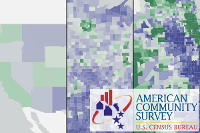

In [11]:
itm = gis.content.get(itm_id)
itm

In [13]:
lyr_lst = itm.layers
lyr_lst

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Median_Income_by_Race_and_Age_Selp_Emp_Boundaries/FeatureServer/0">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Median_Income_by_Race_and_Age_Selp_Emp_Boundaries/FeatureServer/1">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Median_Income_by_Race_and_Age_Selp_Emp_Boundaries/FeatureServer/2">]

In [14]:
lyr = lyr_lst[-1]
lyr

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/ACS_Median_Income_by_Race_and_Age_Selp_Emp_Boundaries/FeatureServer/2">

In [18]:
df = lyr.query("""OBJECTID < 20""", out_sr=4326, as_df=True)
df.head()

,OBJECTID,GEOID,ALAND,AWATER,NAME,State,County,B19049_001E,B19049_001M,B19049_002E,...,B19053_001M,B19053_002E,B19053_002M,B19053_003E,B19053_003M,B19053_calc_pctSelfempE,B19053_calc_pctSelfempM,Shape__Area,Shape__Length,SHAPE
0,1,15001020100,251395456,10656645,Census Tract 201,Hawaii,Hawaii County,52719,9226,NaN,...,125,177,51,1455,130,10.8,3.012568,2.855838e+08,91984.379303,"{""rings"": [[[-155.09080450935, 19.755203460212..."
1,2,15001020202,634357084,1275028,Census Tract 202.02,Hawaii,Hawaii County,46213,7892,NaN,...,53,87,42,562,62,13.4,6.378230,7.192546e+08,159255.572106,"{""rings"": [[[-155.093859471222, 19.75719890222..."
2,3,15001020300,3291798,488896,Census Tract 203,Hawaii,Hawaii County,34575,9823,NaN,...,160,207,97,1460,168,12.4,5.695469,3.734108e+06,17860.550415,"{""rings"": [[[-155.090420510109, 19.73411746145..."
3,4,15001020400,2702028,2217184,Census Tract 204,Hawaii,Hawaii County,32214,16723,NaN,...,115,168,86,1135,128,12.9,6.501317,3.065112e+06,9404.321403,"{""rings"": [[[-155.076645510879, 19.71496946165..."
4,5,15001020500,6092956,96345,Census Tract 205,Hawaii,Hawaii County,28658,3088,NaN,...,182,140,92,2120,196,6.2,4.040114,6.910455e+06,13495.129472,"{""rings"": [[[-155.066234511944, 19.69510346236..."


In [19]:
df.spatial.plot(gis=GIS())

/Users/joel5174/miniconda3/envs/la-covid/lib/python3.8/site-packages/arcgis/features/geo/_accessor.py:2362: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime)):


MapView(layout=Layout(height='400px', width='100%'))

In [32]:
fld_df = pd.DataFrame(lyr.properties.fields)
fld_df

,alias,defaultValue,description,domain,editable,length,name,nullable,sqlType,type
0,Object ID,None,"{""value"":""An ObjectID is a unique, not null in...",None,False,NaN,OBJECTID,False,sqlTypeOther,esriFieldTypeOID
1,Geographic Identifier - FIPS Code,None,"{""value"":""Geographic Identifier, or GEOID is t...",None,True,11.0,GEOID,True,sqlTypeOther,esriFieldTypeString
2,Area of Land (Square Meters),None,"{""value"":""Current area of land in square meter...",None,True,NaN,ALAND,True,sqlTypeOther,esriFieldTypeDouble
3,Area of Water (Square Meters),None,"{""value"":""Current area of water in square mete...",None,True,NaN,AWATER,True,sqlTypeOther,esriFieldTypeDouble
4,Name,None,"{""value"":""Name of this geographical area"", ""fi...",None,True,255.0,NAME,True,sqlTypeOther,esriFieldTypeString
5,State,None,"{""value"":""State in which this geography reside...",None,True,255.0,State,True,sqlTypeOther,esriFieldTypeString
6,County,None,"{""value"":""County in which this geography resid...",None,True,255.0,County,True,sqlTypeOther,esriFieldTypeString
7,Median Household Income in past 12 months (inf...,None,"{""value"":""Income in the past 12 months is the ...",None,True,NaN,B19049_001E,True,sqlTypeOther,esriFieldTypeDouble
8,Median Household Income in past 12 months (inf...,None,"{""value"":""Use this value to add and subtract t...",None,True,NaN,B19049_001M,True,sqlTypeOther,esriFieldTypeDouble
9,"Median Household Income in past 12 months, Hou...",None,"{""value"":""Income in the past 12 months is the ...",None,True,NaN,B19049_002E,True,sqlTypeOther,esriFieldTypeDouble


In [33]:
fld_df.description = fld_df.description.apply(lambda desc: eval(desc)['value'])
fld_df

,alias,defaultValue,description,domain,editable,length,name,nullable,sqlType,type
0,Object ID,None,"An ObjectID is a unique, not null integer fiel...",None,False,NaN,OBJECTID,False,sqlTypeOther,esriFieldTypeOID
1,Geographic Identifier - FIPS Code,None,"Geographic Identifier, or GEOID is the numeric...",None,True,11.0,GEOID,True,sqlTypeOther,esriFieldTypeString
2,Area of Land (Square Meters),None,Current area of land in square meters within t...,None,True,NaN,ALAND,True,sqlTypeOther,esriFieldTypeDouble
3,Area of Water (Square Meters),None,Current area of water in square meters within ...,None,True,NaN,AWATER,True,sqlTypeOther,esriFieldTypeDouble
4,Name,None,Name of this geographical area,None,True,255.0,NAME,True,sqlTypeOther,esriFieldTypeString
5,State,None,State in which this geography resides,None,True,255.0,State,True,sqlTypeOther,esriFieldTypeString
6,County,None,County in which this geography resides,None,True,255.0,County,True,sqlTypeOther,esriFieldTypeString
7,Median Household Income in past 12 months (inf...,None,Income in the past 12 months is the sum of wag...,None,True,NaN,B19049_001E,True,sqlTypeOther,esriFieldTypeDouble
8,Median Household Income in past 12 months (inf...,None,Use this value to add and subtract to get the ...,None,True,NaN,B19049_001M,True,sqlTypeOther,esriFieldTypeDouble
9,"Median Household Income in past 12 months, Hou...",None,Income in the past 12 months is the sum of wag...,None,True,NaN,B19049_002E,True,sqlTypeOther,esriFieldTypeDouble


In [37]:
fld_df.iloc[7].description

'Income in the past 12 months is the sum of wage or salary income; net self-employment income; interest, dividends, or net rental or royalty income or income from estates and trusts; Social Security or Railroad Retirement income; Supplemental Security Income (SSI); public assistance or welfare payments; retirement, survivor, or disability pensions; and all other income. '